In [1]:
# Capitulo 2: Sutton
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Medias de recompenza para cada accion
recomp_at = {"r_a1": 0.25, "r_a2": -0.75, "r_a3": 1.5, "r_a4": 0.5, 
             "r_a5": 1.25, "r_a6": -1.5, "r_a7": -0.25, "r_a8": -1, 
             "r_a9": 0.75, "r_a10": -0.5}

# Figura 2.1 - The 10-armed Testbed

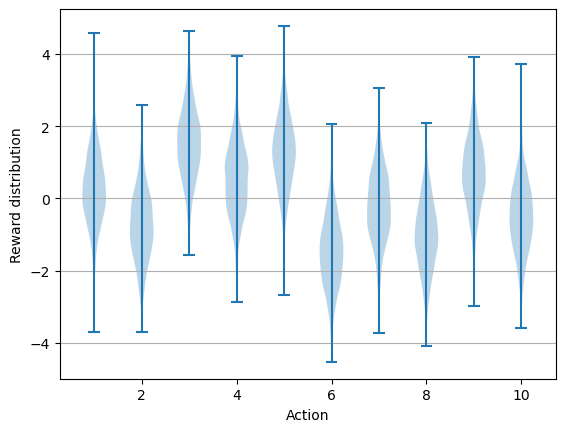

In [4]:
# Simulacion de 2000 muestras
sz_samp = 2000
simul_at = pd.DataFrame({i:np.random.normal(loc=recomp_at[i], size=sz_samp) for i in recomp_at.keys()})
simul_at

# Figura
fig, axes = plt.subplots()
axes.violinplot(dataset = simul_at)
axes.yaxis.grid(True)
axes.set_xlabel('Action')
axes.set_ylabel('Reward distribution')
plt.show()

# Figura 2.2 - A simple bandit Algoritm

![title](imagenes/fig_2_2.jpg)

In [3]:
# Regla de seleccion: Seleccionar la accion con mayor valor esperado en cada ejecucion
# Se inicializa Q(A) y N(A) con 0
def simul_fig_2_2(szTime, recomp_at, epsilon):
    N_a = {i:0 for i in recomp_at.keys()}
    Q_a = {i:0 for i in recomp_at.keys()}
    Q_a_sum = {i:0 for i in recomp_at.keys()}
    RList = list() # recompenza en cada tiempo
    AccionElegida = list()
    
    # Se realizan la ejecucion de los pasos
    for t in range(szTime):
        actionList = [Q_a[i] for i in Q_a.keys()] # Valor esperado de cada accion en formato lista
        
        # Se ejecuta un draw para ver si se explora o se explota
        if (np.random.rand()>epsilon):
            # Se explota o Se extrae la posicion del maximo valor esperado
            indMax = np.argwhere(actionList == np.amax(actionList)).flatten() # Me aseguro q escoja aleatoriamente uno de los maximos
            pos_max = np.random.choice(indMax)
        
        else:
            pos_max = np.random.randint(len(actionList)) # Se explora
            
        key_asoc = f"r_a{pos_max+1}"    # Llave asociada a Q(a) con maximo valor esperado. Ejemplo r_a5        
        drawMax = np.random.normal(loc=recomp_at[key_asoc]) # Rentabilidad asociada a la accion elegida
        Q_a_sum[key_asoc] += drawMax    # Se suma la recompenza para contabilizar
        N_a[key_asoc] += 1              # Contador de veces q se eligio una accion especifica. Ejemplo r_a5
        Q_a[key_asoc] = Q_a_sum[key_asoc]/N_a[key_asoc] # Valor esperado de la accion

        # Se guarda informacion para graficos
        AccionElegida.append(pos_max) # Se guarda la accion elegida. Por ejemplo: r_a5
        RList.append(drawMax) # Se guarda la rentabilidad asociada a la accion elegida
        
    return Q_a, AccionElegida, RList


In [115]:
# ----------------------------------------------------------------------------------
# Se realizan las simulaciones para diferentes epsilon
simRecompenza_dct =  dict()
simAccionSele_dct =  dict()
Q_a_dct = dict()

# Mejor Accion
recomp_at_lst = [recomp_at[i] for i in recomp_at.keys()]  # Evidentemente es r_a3=1.5
mejorAccion = np.argmax(recomp_at_lst)

# Parametros para simulacion
epsilons = [0,0.01,0.1]
szTime = 1000
szSimul = 2000

for eps in epsilons: # Por cada epsilon
    simAccionSele_lst = list()
    simRecompenza_lst = list()
    Q_a_lst = list()
    for i in range(szSimul):
        Q_a, AccionElegida, RList = simul_fig_2_2(szTime, recomp_at, eps)
        Q_a_lst.append(Q_a)
        simAccionSele_lst.append(AccionElegida==mejorAccion)
        simRecompenza_lst.append(RList)   

    # Se guarda Q_as por cada epsilon
    Q_a_dct[f"eps_{eps}"] = Q_a_lst
    # Se colapsa la matriz de 2000x1000 en una de 1x1000
    simAccionSele_dct[f"eps_{eps}"] = np.array(simAccionSele_lst).mean(axis=0)
    simRecompenza_dct[f"eps_{eps}"] = np.array(simRecompenza_lst).mean(axis=0)


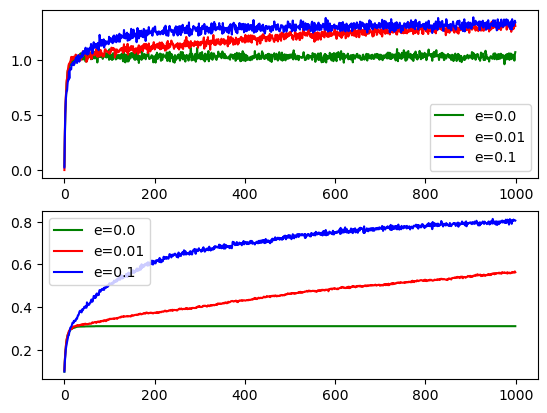

In [116]:
# Graficos
# Promedio de las recompenzas
result1 = simRecompenza_dct['eps_0']
result2 = simRecompenza_dct['eps_0.01']
result3 = simRecompenza_dct['eps_0.1']

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(result1, label = "e=0.0", color="green")
ax[0].plot(result2, label = "e=0.01", color="red")
ax[0].plot(result3, label = "e=0.1", color="blue")
ax[0].legend()


# % de Acciones correctas elegidas
opti_eps_0_0 =  simAccionSele_dct['eps_0']
opti_eps_0_01 =  simAccionSele_dct['eps_0.01']
opti_eps_0_1 =  simAccionSele_dct['eps_0.1']

ax[1].plot(opti_eps_0_0, label = "e=0.0", color="green")
ax[1].plot(opti_eps_0_01, label = "e=0.01", color="red")
ax[1].plot(opti_eps_0_1, label = "e=0.1", color="blue")
ax[1].legend()
plt.show()

# Figura 2.3 - Optimistic Initial Values

In [6]:
def simul_fig_2_3(szTime, recomp_at, q1_ini, epsilon):
    N_a = {i:0 for i in recomp_at.keys()} 
    Q_a = {i:q1_ini for i in recomp_at.keys()} # Se cambian los valores iniciales por +5
    Q_a_sum = {i:q1_ini for i in recomp_at.keys()}
    RList = list() # recompenza en cada tiempo
    AccionElegida = list()
    
    # Se realizan la ejecucion de los pasos
    for t in range(szTime):
        actionList = [Q_a[i] for i in Q_a.keys()] # Valor esperado de cada accion en formato lista
        
        # Se ejecuta un draw para ver si se explora o se explota
        if (np.random.rand()>epsilon):
            # Se explota o Se extrae la posicion del maximo valor esperado
            indMax = np.argwhere(actionList == np.amax(actionList)).flatten() # Me aseguro q escoja aleatoriamente uno de los maximos
            pos_max = np.random.choice(indMax)
        
        else:
            pos_max = np.random.randint(len(actionList)) # Se explora
            
        key_asoc = f"r_a{pos_max+1}"    # Llave asociada a Q(a) con maximo valor esperado. Ejemplo r_a5        
        drawMax = np.random.normal(loc=recomp_at[key_asoc]) # Rentabilidad asociada a la accion elegida
        Q_a_sum[key_asoc] += drawMax    # Se suma la recompenza para contabilizar
        N_a[key_asoc] += 1              # Contador de veces q se eligio una accion especifica. Ejemplo r_a5
        Q_a[key_asoc] = Q_a_sum[key_asoc]/N_a[key_asoc] # Valor esperado de la accion

        # Se guarda informacion para graficos
        AccionElegida.append(pos_max)
        RList.append(drawMax)
        
    return Q_a, AccionElegida, RList


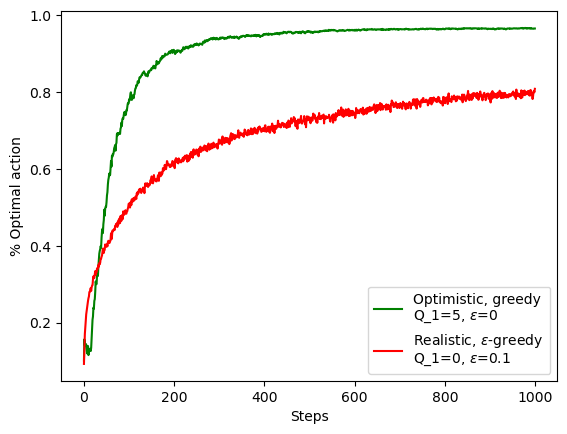

In [7]:
# Realistic Greedy: Q=0, epsilon=0.1
szTime = 1000
szSimul = 2000

opti_q1 = 5
opti_eps =  0.0

real_q1 = 0
real_eps = 0.1

# Mejor Accion
recomp_at_lst = [recomp_at[i] for i in recomp_at.keys()]
mejorAccion = np.argmax(recomp_at_lst)

opti_matrixAcc = list()
real_matrixAcc = list()

for i in range(szSimul):
    _, opti_AccSel, _ = simul_fig_2_3(szTime, recomp_at, opti_q1, opti_eps)
    opti_matrixAcc.append(opti_AccSel==mejorAccion)

    _, real_AccSel, _ = simul_fig_2_3(szTime, recomp_at, real_q1, real_eps)
    real_matrixAcc.append(real_AccSel==mejorAccion)

# Se colapsa a nivel de cada t->tiempo
simulOpti = np.array(opti_matrixAcc).mean(axis=0) 
simulReal = np.array(real_matrixAcc).mean(axis=0)

# Grafico
plt.plot(simulOpti, label = "Optimistic, greedy \nQ_1=5, $\epsilon$=0", color="green")
plt.plot(simulReal, label = "Realistic, $\epsilon$-greedy \nQ_1=0, $\epsilon$=0.1", color="red")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.show()

# Figura 2.4 - Upper Confidence Bound

![title](imagenes/fig_2_4.jpg)

In [8]:
def simul_ucb(szTime, recomp_at, q1_ini, c_val):
    N_a = {i:0 for i in recomp_at.keys()} # Diccionario con cuenta de veces q selecciono una accion
    Q_a = {i:q1_ini for i in recomp_at.keys()} # Se cambian los valores iniciales por +5
    Q_a_sum = {i:q1_ini for i in recomp_at.keys()}
    RList = list() # recompenza en cada tiempo
    AccionElegida = list()
    
    # Se realizan la ejecucion de los pasos
    for t in range(szTime):
        # Se implementa Upper.Confidence-Bound. Obs: el t que itera comienza en 0, por eso se suma 1
        t_prima = t + 1
        actionList = [ Q_a[i] + c_val*np.sqrt( np.log(t_prima) / N_a[i] ) if N_a[i] > 0 else Q_a[i] + c_val*np.sqrt( np.log(t_prima) / 0.0001 ) for i in Q_a.keys()] 

        # Siempre se elige el argumento maximo de los disponibles
        indMax = np.argwhere(actionList == np.amax(actionList)).flatten() # Me aseguro q escoja aleatoriamente uno de los maximos        
        pos_max = np.random.choice(indMax)        
        key_asoc = f"r_a{pos_max+1}"    # Llave asociada a Q(a) con maximo valor esperado. Ejemplo r_a5        
        drawMax = np.random.normal(loc=recomp_at[key_asoc]) # Rentabilidad asociada a la accion elegida
        Q_a_sum[key_asoc] += drawMax    # Se suma la recompenza para contabilizar
        N_a[key_asoc] += 1              # Contador de veces q se eligio una accion especifica. Ejemplo r_a5
        Q_a[key_asoc] = Q_a_sum[key_asoc]/N_a[key_asoc] # Valor esperado de la accion

        # Se guarda informacion para graficos
        AccionElegida.append(pos_max)
        RList.append(drawMax)
        
    return Q_a, AccionElegida, RList


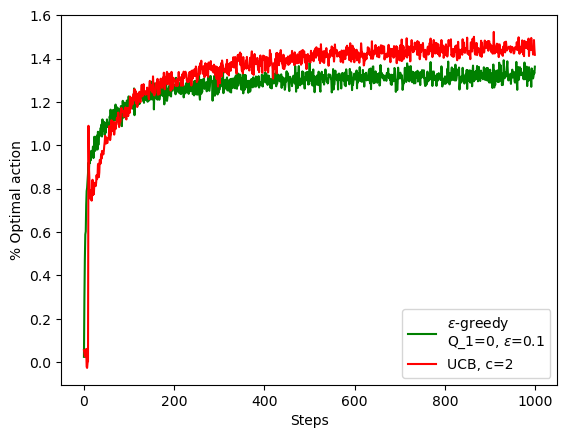

In [9]:
# Realistic Greedy: Q=0, epsilon=0.1
szTime = 1000
szSimul = 2000

greedy_q1 = 0
greedy_eps = 0.1

c_val = 2

# Mejor Accion
recomp_at_lst = [recomp_at[i] for i in recomp_at.keys()]
mejorAccion = np.argmax(recomp_at_lst)

greedy_matrixAcc = list()
ucb_matrixAcc = list()

for i in range(szSimul):
    _, _, greedy_Reward = simul_fig_2_3(szTime, recomp_at, greedy_q1, greedy_eps)
    greedy_matrixAcc.append(greedy_Reward)

    _, _, ucb_Reward = simul_ucb(szTime, recomp_at, real_q1, c_val)
    ucb_matrixAcc.append(ucb_Reward)

# Se colapsa a nivel de cada t->tiempo
simulGreedy = np.array(greedy_matrixAcc).mean(axis=0) 
simulUCB = np.array(ucb_matrixAcc).mean(axis=0)

# Grafico
plt.plot(simulGreedy, label = "$\epsilon$-greedy \nQ_1=0, $\epsilon$=0.1", color="green")
plt.plot(simulUCB, label = "UCB, c=2", color="red")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.show()

# Figura 2.5 - Gradient Bandit Algorithms

![title](imagenes/fig_2_5_0.jpg)
![title](imagenes/fig_2_5.jpg)


In [10]:
def prob_pi(Ht_dict, accion):
    numerador = np.exp(Ht_dict[accion])
    denominador = np.sum([np.exp(i) for i in list(Ht_dict.values())])
    return numerador/denominador

def probTotal(Ht_dict):
    return [prob_pi(Ht_dict, i) for i in Ht_dict.keys()]

# Movimiento de Ht+1 cuanto At=a
def movHt_a(Ht_dict, accion, alpha, reward, meanReward):
    for key in Ht_dict.keys():
        if (accion==key): # En caso la accion sea la selecciona
            Ht_dict[key] = Ht_dict[key] +  alpha*(reward - meanReward)*(1-prob_pi(Ht_dict, key))
        else:
            Ht_dict[key] = Ht_dict[key] -  alpha*(reward - meanReward)*prob_pi(Ht_dict, key)
    return Ht_dict

# Funcion para simular en el tiempo
def simul_GB(Ht_dict, szTime, acciones, alpha, recomp_at, baseline):
    sumReward = 0
    conteo = 0
    Ht_dict_temp = Ht_dict.copy()
    accSelList = list()
    for i in range(szTime):
        # Paso 1: Se selecciona una accion en base a sus probabilidades
        prob_acc = probTotal(Ht_dict_temp)
        accionSel = np.random.choice(acciones, 1, p=prob_acc)[0] # Se selecciona una accion
        
        # Paso 2: Calculo de la recompensa en base a la accion seleccionada
        reward = np.random.normal(loc=recomp_at[f"r_{accionSel}"])

        # Paso 3: Se actualizan las recompenzas y el conteo
        if baseline:
            sumReward += reward
            conteo += 1
            meanReward = sumReward/conteo
        else:
            meanReward = 0
        
        # Paso 4: Regla de movimiento de preferencias HT
        Ht_dict_temp = movHt_a(Ht_dict_temp, accionSel, alpha, reward, meanReward)

        # Paso 5: Se guarda informacion de las acciones seleccionada
        accSelList.append(accionSel)
    
    return accSelList

In [11]:
# ---------------------------------------------------------------------
# Se realiza la simulacion
# Se coloca todas las preferencias sobre las acciones en 0
Ht_dict = {"a1":0, "a2":0, "a3":0, "a4":0,
           "a5":0, "a6":0, "a7":0, "a8":0,
           "a9":0, "a10":0}

# Acciones
acciones = list(Ht_dict.keys())

# Recompensa inicial simuladas
media_q_t =  4
np.random.seed(15)
simulInit = np.random.normal(loc=media_q_t, size=10)
recomp_at = {"r_a1": simulInit[0], "r_a2": simulInit[1], 
             "r_a3": simulInit[2], "r_a4": simulInit[3], 
             "r_a5": simulInit[4], "r_a6": simulInit[5], 
             "r_a7": simulInit[6], "r_a8": simulInit[7], 
             "r_a9": simulInit[8], "r_a10": simulInit[9]}

recomp_at_lst = [recomp_at[i] for i in recomp_at.keys()]
mejorAccion = acciones[np.argmax(recomp_at_lst)]

# Numero de iteraciones
szSimul = 2000
szTime = 1000

alpha1 = 0.1
alpha2 = 0.4

# Se itera segun las iteraciones seleccionadas
simBas1 = list()
simBas2 = list()
simBas3 = list()
simBas4 = list()
for t in range(szSimul):
    # Caso con baseline
    print(np.round(t/szSimul*100, 2), "%", end='\r')
    result1 = simul_GB(Ht_dict, szTime, acciones, alpha1, recomp_at, baseline=True)
    simBas1.append(np.array(result1)==mejorAccion)
    result2 = simul_GB(Ht_dict, szTime, acciones, alpha2, recomp_at, baseline=True)
    simBas2.append(np.array(result2)==mejorAccion)
    
    # Casos si baseline
    result3 = simul_GB(Ht_dict, szTime, acciones, alpha1, recomp_at, baseline=False)
    simBas3.append(np.array(result3)==mejorAccion)
    result4 = simul_GB(Ht_dict, szTime, acciones, alpha2, recomp_at, baseline=False)
    simBas4.append(np.array(result4)==mejorAccion)

# Se colapsa a nivel de cada t->tiempo
simulEjec1 = np.array(simBas1).mean(axis=0)
simulEjec2 = np.array(simBas2).mean(axis=0)
simulEjec3 = np.array(simBas3).mean(axis=0)
simulEjec4 = np.array(simBas4).mean(axis=0)

# Grafico
plt.plot(simulEjec1, label = "with baseline, $a$=0.1", color="blue")
plt.plot(simulEjec2, label = "with baseline, $a$=0.4", color="skyblue")

plt.plot(simulEjec3, label = "without baseline, $a$=0.1", color="saddlebrown")
plt.plot(simulEjec4, label = "without baseline, $a$=0.4", color="chocolate")

plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.show()

KeyboardInterrupt: 